### Import Modules & Packages

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Read Images and Create Label

In [2]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir('flowers'):
    for file in os.listdir(os.path.join('flowers', folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join('flowers', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'flowers'

### Conversion to numerical values

In [3]:
data_arr = np.array(data)
label_arr = np.array(label)

### Normalize Data

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

### Train - Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

### Training Neural Networks

In [6]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

### Creating more Training images (to prevent overfitting)

In [7]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

### Compile

In [8]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (X_test,y_test),
    verbose = 1
)

C:\Users\ASK\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/64
2/2 [==============================] - 4s 3s/step - loss: 1.5068 - accuracy: 0.4048 - val_loss: 1.1545 - val_accuracy: 0.4545
Epoch 2/64
2/2 [==============================] - 3s 977ms/step - loss: 1.1519 - accuracy: 0.4762 - val_loss: 1.0596 - val_accuracy: 0.4545
Epoch 3/64
2/2 [==============================] - 3s 1s/step - loss: 1.3086 - accuracy: 0.4048 - val_loss: 1.0530 - val_accuracy: 0.4545
Epoch 4/64
2/2 [==============================] - 3s 972ms/step - loss: 1.2497 - accuracy: 0.3810 - val_loss: 1.0811 - val_accuracy: 0.4545
Epoch 5/64
2/2 [==============================] - 4s 1s/step - loss: 1.2696 - accuracy: 0.4286 - val_loss: 1.1200 - val_accuracy: 0.4545
Epoch 6/64
2/2 [==============================] - 4s 3s/step - loss: 1.3308 - accuracy: 0.4048 - val_loss: 1.0914 - val_accuracy: 0.4545
Epoch 7/64
2/2 [==============================] - 4s 1s/step - loss: 1.2261 - accuracy: 0.4048 - val_loss: 1.0712 - val_accuracy: 0.4545
Epoch 8/64
2/2 [===================

### Outcome

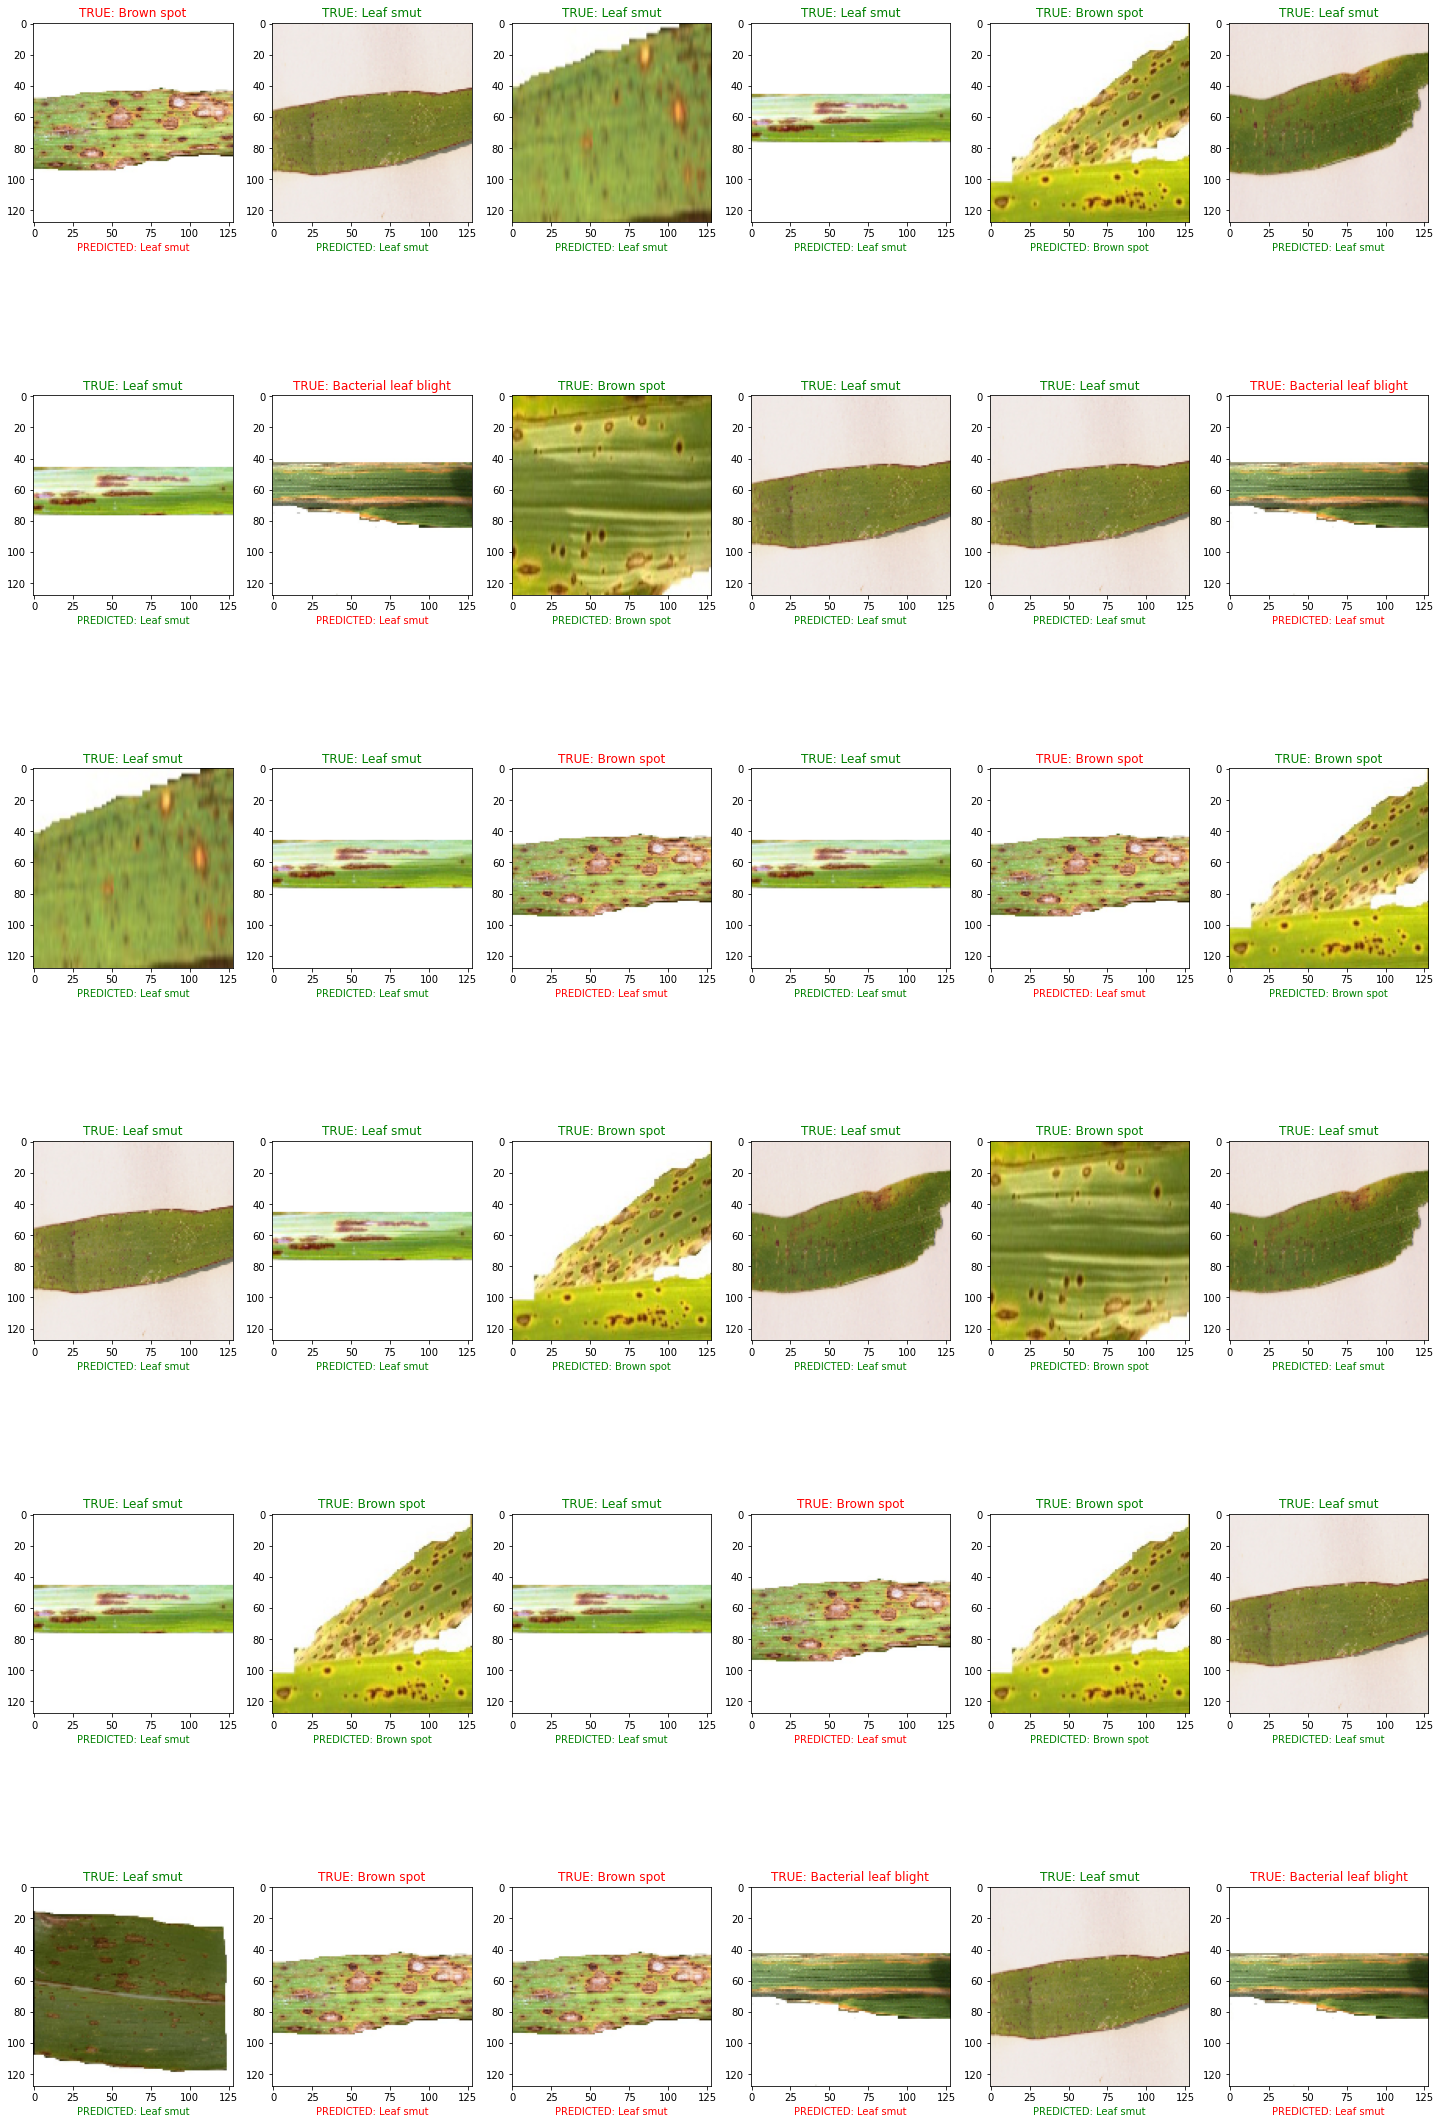

In [9]:
categories = np.sort(os.listdir('flowers'))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')